# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return((x**2)*numpy.sin(x))

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''                                                          
    return((2-x**2)*numpy.cos(x)+2*x*numpy.sin(x)-2)

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return(g(xmax)-g(xmin))

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [28]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    width=(xmax-xmin)/N
    integral = 0
    for n in range (0,N):
        x1 = xmin + width*n
        x2 = x1 + (width/2)
        x3 = x1 + width
        integral += (width/6)*(f(x1) + 4*f(x2) + f(x3))
    return(integral)
        

Make sure you have implemented Simpson's rule correctly:

In [29]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [30]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


[3.92396565e-04 2.41801396e-05 1.50593504e-06 9.40379961e-08
 5.87608007e-09 3.67234687e-10 2.29523067e-11 1.43440815e-12
 9.14823772e-14]


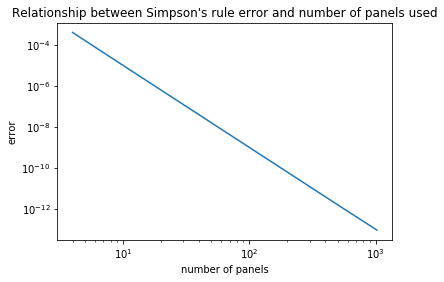

In [55]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_difference = numpy.zeros((9))
for n in range(0,9):
    result_difference[n] = abs(integrate_numeric(0, 2, panel_counts[n]) - result_analytic)
# Is there a better way of doing this? 
plt.loglog(panel_counts, result_difference)
plt.xlabel("number of panels")
plt.ylabel("error")
plt.title("Relationship between Simpson's rule error and number of panels used")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In general, increasing the number of panels makes the numerical method more accurate (in the case of Simpson's rule, error is proportional to $N^{-4}$).  If the number of panels taken is too large, numerical difference errors will creep in and increase error (to a certain point, around which it will fluctuate seemingly randomly).

If the trapezium rule was being used, how would the panel
count affect accuracy? 

In general, the effect would be very similar to that for Simpson's rule but differ as follows:
- The error would decrease (in the straight-line section) as $N^{-2}$ instead of $N^{-4}$.
- Numerical difference error would only be seen from a higher value of $N$.